<img src="https://s2.glbimg.com/Bu6upvmSg6SRv0za635uXphThKo=/620x430/e.glbimg.com/og/ed/f/original/2020/03/28/mercado-livre.jpg" width=30%/>

# Data Science Challenge - Data & Analytics Team

## 3. Previsión de falla
### Descripción

Los galpones de Full de mercado libre cuentan con una flota de dispositivos que transmiten diariamente telemetría agregada en varios atributos.
Las técnicas de mantenimiento predictivo están diseñadas para ayudar a determinar la condición del equipo de mantenimiento en servicio para predecir cuándo se debe realizar el mantenimiento. Este enfoque promete ahorros de costos sobre el mantenimiento preventivo de rutina o basado en el tiempo porque las tareas se realizan solo cuando están justificadas.

### Entregable

Tiene la tarea de generar una Jupyter notebook con un modelo predictivo para predecir la probabilidad de falla del dispositivo con el objetivo de bajar los costos del proceso. Como una referencia, una falla de un dispositivo tiene un costo de 1 mientras el costo de un mantenimiento es 0,5. El archivo "full_devices.csv" tiene los valores diários para los 9 atributos de los dispositivos y la columna que está tratando de predecir se llama 'failure' con
el valor binario 0 para no fallar y 1 para fallar.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importando libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib.pyplot import figure

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MELI/full_devices.csv', encoding='latin-1')

In [4]:
df.shape

(124494, 12)

In [5]:
df.head()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        124494 non-null  object
 1   device      124494 non-null  object
 2   failure     124494 non-null  int64 
 3   attribute1  124494 non-null  int64 
 4   attribute2  124494 non-null  int64 
 5   attribute3  124494 non-null  int64 
 6   attribute4  124494 non-null  int64 
 7   attribute5  124494 non-null  int64 
 8   attribute6  124494 non-null  int64 
 9   attribute7  124494 non-null  int64 
 10  attribute8  124494 non-null  int64 
 11  attribute9  124494 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 11.4+ MB


In [7]:
for i in df:
  print(df[i].value_counts())
  print("---"*20)

2015-01-01    1163
2015-01-02    1163
2015-01-03    1163
2015-01-04    1162
2015-01-05    1161
              ... 
2015-10-27      31
2015-10-29      31
2015-10-30      31
2015-10-31      31
2015-11-02      31
Name: date, Length: 304, dtype: int64
------------------------------------------------------------
Z1F0QLC1    304
S1F0KYCR    304
S1F0E9EP    304
S1F0EGMT    304
S1F0FGBQ    304
           ... 
W1F1CHZK      5
W1F1CJKT      5
S1F04KSC      4
W1F0WJFT      3
W1F1DA5ÿ      1
Name: device, Length: 1169, dtype: int64
------------------------------------------------------------
0    124388
1       106
Name: failure, dtype: int64
------------------------------------------------------------
57192360     26
89196552     26
165048912    26
169490248    23
57180136     15
             ..
181770800     1
201893264     1
238768304     1
53326688      1
17572840      1
Name: attribute1, Length: 123877, dtype: int64
------------------------------------------------------------
0        118110
2

In [8]:
df.isnull().sum()

date          0
device        0
failure       0
attribute1    0
attribute2    0
attribute3    0
attribute4    0
attribute5    0
attribute6    0
attribute7    0
attribute8    0
attribute9    0
dtype: int64

Não temos valores nulos.

In [9]:
falhas = df.copy()

In [10]:
# Dataframe apenas com linhas de dispositivos que falharam
falhas = falhas[falhas['failure'] == 1]

In [11]:
falhas

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
4885,2015-01-05,S1F0RRB1,1,48467332,64776,0,841,8,39267,56,56,1
6879,2015-01-07,S1F0CTDN,1,184069720,528,0,4,9,387871,32,32,3
8823,2015-01-09,W1F0PNA5,1,136429411,64784,0,406,30,224801,8,8,0
11957,2015-01-13,W1F13SRV,1,188251248,2040,0,0,6,39345,32,32,1
12668,2015-01-14,W1F1230J,1,220461296,0,0,0,14,325125,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
109927,2015-08-04,W1F1CB5E,1,16043296,88,0,0,9,30,0,0,0
114251,2015-08-18,Z1F0MRPJ,1,65654088,0,0,0,9,298592,0,0,11
122118,2015-10-05,S1F0JGJV,1,13739704,0,0,18,8,343760,0,0,0
122808,2015-10-09,Z1F14BGY,1,85259320,0,0,164,8,262932,0,0,0


In [12]:
falhas['device'].nunique()

106

In [13]:
# Dataframe apenas com linhas sem falha
sem_falhas = df.copy()
sem_falhas = sem_falhas[sem_falhas['failure'] == 0]
sem_falhas.shape

(124388, 12)

In [14]:
# Merge nos dois datasets com e sem falhas, cruzando com devices que falharam
df_novo = falhas.merge(sem_falhas, on='device', how='inner')

In [15]:
df_novo['device'].nunique()

106

Temos 106 dispositivos que falharam.

In [16]:
df_novo.shape

(10607, 23)

In [17]:
df_novo.columns

Index(['date_x', 'device', 'failure_x', 'attribute1_x', 'attribute2_x',
       'attribute3_x', 'attribute4_x', 'attribute5_x', 'attribute6_x',
       'attribute7_x', 'attribute8_x', 'attribute9_x', 'date_y', 'failure_y',
       'attribute1_y', 'attribute2_y', 'attribute3_y', 'attribute4_y',
       'attribute5_y', 'attribute6_y', 'attribute7_y', 'attribute8_y',
       'attribute9_y'],
      dtype='object')

In [18]:
df_novo

,date_x,device,failure_x,attribute1_x,attribute2_x,attribute3_x,attribute4_x,attribute5_x,attribute6_x,attribute7_x,...,failure_y,attribute1_y,attribute2_y,attribute3_y,attribute4_y,attribute5_y,attribute6_y,attribute7_y,attribute8_y,attribute9_y
0,2015-01-05,S1F0RRB1,1,48467332,64776,0,841,8,39267,56,...,0,5230888,2288,0,37,8,39267,24,24,1
1,2015-01-05,S1F0RRB1,1,48467332,64776,0,841,8,39267,56,...,0,13307628,64776,0,49,8,39267,56,56,1
2,2015-01-05,S1F0RRB1,1,48467332,64776,0,841,8,39267,56,...,0,26258330,64776,0,135,8,39267,56,56,1
3,2015-01-05,S1F0RRB1,1,48467332,64776,0,841,8,39267,56,...,0,37985862,64776,0,763,8,39267,56,56,1
4,2015-01-07,S1F0CTDN,1,184069720,528,0,4,9,387871,32,...,0,50147888,528,0,4,9,381198,32,32,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10602,2015-10-26,W1F0T0B1,1,95073232,0,0,7,9,354861,22,...,0,240025832,0,0,0,9,351917,16,16,0
10603,2015-10-26,W1F0T0B1,1,95073232,0,0,7,9,354861,22,...,0,112824920,0,0,0,9,352949,16,16,0
10604,2015-10-26,W1F0T0B1,1,95073232,0,0,7,9,354861,22,...,0,52620456,0,0,0,9,352949,16,16,0
10605,2015-10-26,W1F0T0B1,1,95073232,0,0,7,9,354861,22,...,0,154144032,0,0,0,9,352949,16,16,0


In [19]:
# Splittando o dataframe merged em dois datasets

df_x = df_novo[['date_x', 'device', 'failure_x', 'attribute1_x', 'attribute2_x',
       'attribute3_x', 'attribute4_x', 'attribute5_x', 'attribute6_x',
       'attribute7_x', 'attribute8_x', 'attribute9_x']]
df_y = df_novo[['date_y', 'device', 'failure_y',
       'attribute1_y', 'attribute2_y', 'attribute3_y', 'attribute4_y',
       'attribute5_y', 'attribute6_y', 'attribute7_y', 'attribute8_y',
       'attribute9_y']]
display(df_x)
display(df_y)

,date_x,device,failure_x,attribute1_x,attribute2_x,attribute3_x,attribute4_x,attribute5_x,attribute6_x,attribute7_x,attribute8_x,attribute9_x
0,2015-01-05,S1F0RRB1,1,48467332,64776,0,841,8,39267,56,56,1
1,2015-01-05,S1F0RRB1,1,48467332,64776,0,841,8,39267,56,56,1
2,2015-01-05,S1F0RRB1,1,48467332,64776,0,841,8,39267,56,56,1
3,2015-01-05,S1F0RRB1,1,48467332,64776,0,841,8,39267,56,56,1
4,2015-01-07,S1F0CTDN,1,184069720,528,0,4,9,387871,32,32,3
...,...,...,...,...,...,...,...,...,...,...,...,...
10602,2015-10-26,W1F0T0B1,1,95073232,0,0,7,9,354861,22,22,0
10603,2015-10-26,W1F0T0B1,1,95073232,0,0,7,9,354861,22,22,0
10604,2015-10-26,W1F0T0B1,1,95073232,0,0,7,9,354861,22,22,0
10605,2015-10-26,W1F0T0B1,1,95073232,0,0,7,9,354861,22,22,0


,date_y,device,failure_y,attribute1_y,attribute2_y,attribute3_y,attribute4_y,attribute5_y,attribute6_y,attribute7_y,attribute8_y,attribute9_y
0,2015-01-01,S1F0RRB1,0,5230888,2288,0,37,8,39267,24,24,1
1,2015-01-02,S1F0RRB1,0,13307628,64776,0,49,8,39267,56,56,1
2,2015-01-03,S1F0RRB1,0,26258330,64776,0,135,8,39267,56,56,1
3,2015-01-04,S1F0RRB1,0,37985862,64776,0,763,8,39267,56,56,1
4,2015-01-01,S1F0CTDN,0,50147888,528,0,4,9,381198,32,32,3
...,...,...,...,...,...,...,...,...,...,...,...,...
10602,2015-10-21,W1F0T0B1,0,240025832,0,0,0,9,351917,16,16,0
10603,2015-10-22,W1F0T0B1,0,112824920,0,0,0,9,352949,16,16,0
10604,2015-10-23,W1F0T0B1,0,52620456,0,0,0,9,352949,16,16,0
10605,2015-10-24,W1F0T0B1,0,154144032,0,0,0,9,352949,16,16,0


In [20]:
df_x = df_x.rename(columns={
    'date_x':'date',
    'failure_x':'failure',
    'attribute1_x':'attribute1', 
    'attribute2_x':'attribute2', 
    'attribute3_x':'attribute3', 
    'attribute4_x':'attribute4', 
    'attribute5_x':'attribute5', 
    'attribute6_x':'attribute6', 
    'attribute7_x':'attribute7', 
    'attribute8_x':'attribute8', 
    'attribute9_x':'attribute9'})

df_y = df_y.rename(columns={
    'date_y':'date',
    'failure_y':'failure',
    'attribute1_y':'attribute1', 
    'attribute2_y':'attribute2', 
    'attribute3_y':'attribute3', 
    'attribute4_y':'attribute4', 
    'attribute5_y':'attribute5', 
    'attribute6_y':'attribute6', 
    'attribute7_y':'attribute7', 
    'attribute8_y':'attribute8', 
    'attribute9_y':'attribute9'})

display(df_x)
display(df_y)

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-05,S1F0RRB1,1,48467332,64776,0,841,8,39267,56,56,1
1,2015-01-05,S1F0RRB1,1,48467332,64776,0,841,8,39267,56,56,1
2,2015-01-05,S1F0RRB1,1,48467332,64776,0,841,8,39267,56,56,1
3,2015-01-05,S1F0RRB1,1,48467332,64776,0,841,8,39267,56,56,1
4,2015-01-07,S1F0CTDN,1,184069720,528,0,4,9,387871,32,32,3
...,...,...,...,...,...,...,...,...,...,...,...,...
10602,2015-10-26,W1F0T0B1,1,95073232,0,0,7,9,354861,22,22,0
10603,2015-10-26,W1F0T0B1,1,95073232,0,0,7,9,354861,22,22,0
10604,2015-10-26,W1F0T0B1,1,95073232,0,0,7,9,354861,22,22,0
10605,2015-10-26,W1F0T0B1,1,95073232,0,0,7,9,354861,22,22,0


,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-01,S1F0RRB1,0,5230888,2288,0,37,8,39267,24,24,1
1,2015-01-02,S1F0RRB1,0,13307628,64776,0,49,8,39267,56,56,1
2,2015-01-03,S1F0RRB1,0,26258330,64776,0,135,8,39267,56,56,1
3,2015-01-04,S1F0RRB1,0,37985862,64776,0,763,8,39267,56,56,1
4,2015-01-01,S1F0CTDN,0,50147888,528,0,4,9,381198,32,32,3
...,...,...,...,...,...,...,...,...,...,...,...,...
10602,2015-10-21,W1F0T0B1,0,240025832,0,0,0,9,351917,16,16,0
10603,2015-10-22,W1F0T0B1,0,112824920,0,0,0,9,352949,16,16,0
10604,2015-10-23,W1F0T0B1,0,52620456,0,0,0,9,352949,16,16,0
10605,2015-10-24,W1F0T0B1,0,154144032,0,0,0,9,352949,16,16,0


In [21]:
# Concatenando os dfs x e y
df_novo2 = pd.concat([df_x, df_y], axis=0)
df_novo2

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-05,S1F0RRB1,1,48467332,64776,0,841,8,39267,56,56,1
1,2015-01-05,S1F0RRB1,1,48467332,64776,0,841,8,39267,56,56,1
2,2015-01-05,S1F0RRB1,1,48467332,64776,0,841,8,39267,56,56,1
3,2015-01-05,S1F0RRB1,1,48467332,64776,0,841,8,39267,56,56,1
4,2015-01-07,S1F0CTDN,1,184069720,528,0,4,9,387871,32,32,3
...,...,...,...,...,...,...,...,...,...,...,...,...
10602,2015-10-21,W1F0T0B1,0,240025832,0,0,0,9,351917,16,16,0
10603,2015-10-22,W1F0T0B1,0,112824920,0,0,0,9,352949,16,16,0
10604,2015-10-23,W1F0T0B1,0,52620456,0,0,0,9,352949,16,16,0
10605,2015-10-24,W1F0T0B1,0,154144032,0,0,0,9,352949,16,16,0


In [22]:
df_novo2['device'].value_counts()

W1F0T0B1    596
Z1F14BGY    562
S1F0JGJV    554
Z1F0MRPJ    458
W1F11ZG9    456
           ... 
W1F0PNA5     16
S1F10E6M     12
S1F0CTDN     12
S1F11MB0     12
S1F0RRB1      8
Name: device, Length: 106, dtype: int64

In [23]:
df_novo2.isnull().sum()

date          0
device        0
failure       0
attribute1    0
attribute2    0
attribute3    0
attribute4    0
attribute5    0
attribute6    0
attribute7    0
attribute8    0
attribute9    0
dtype: int64

In [24]:
# Visualizando distribuição de valores

for i in df_novo2:
  fig = px.histogram(df_novo2, x = i)
  fig.show()

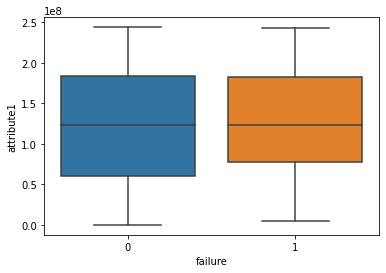

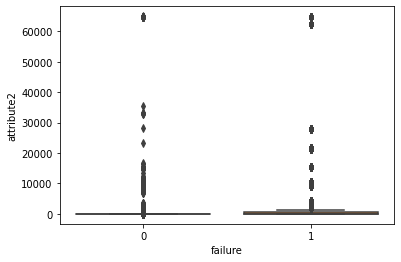

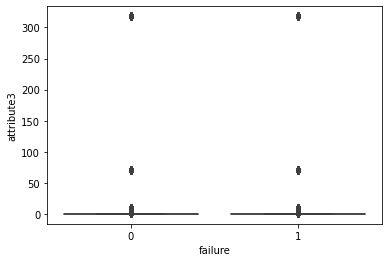

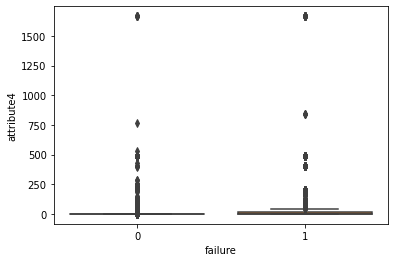

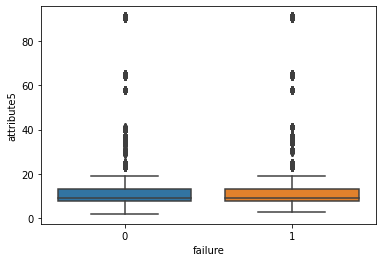

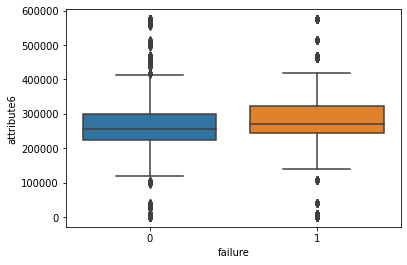

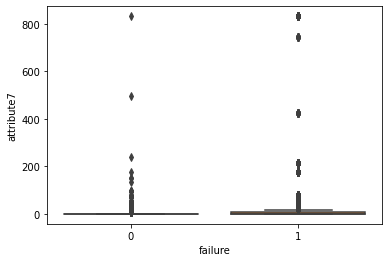

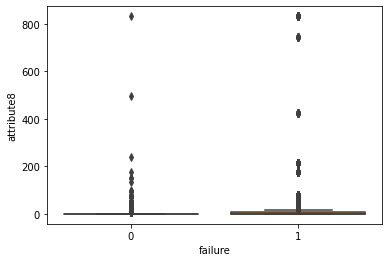

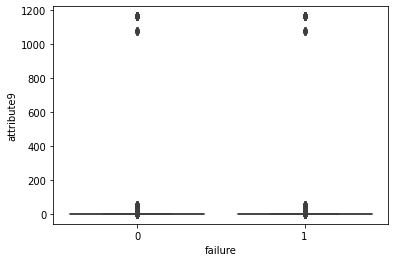

In [25]:
# Buscando outliers

for i in df_novo2:
  if i == 'device':
    continue
  elif i == 'date':
    continue
  elif i == 'failure':
    continue
  ax = sns.boxplot(x='failure', y=i, data=df_novo2)
  plt.show()

Como os atributos parecem ser valores específicos, creio que seja arriscado tratar outliers.

In [26]:
# Correlação inicial

corrPearson = df_novo2.corr('pearson')[['failure']].sort_values(by='failure', ascending=False)
print(corrPearson)

             failure
failure     1.000000
attribute2  0.177807
attribute7  0.135281
attribute8  0.135281
attribute4  0.134664
attribute6  0.082542
attribute1  0.012781
attribute5  0.008079
attribute9  0.000713
attribute3  0.000007


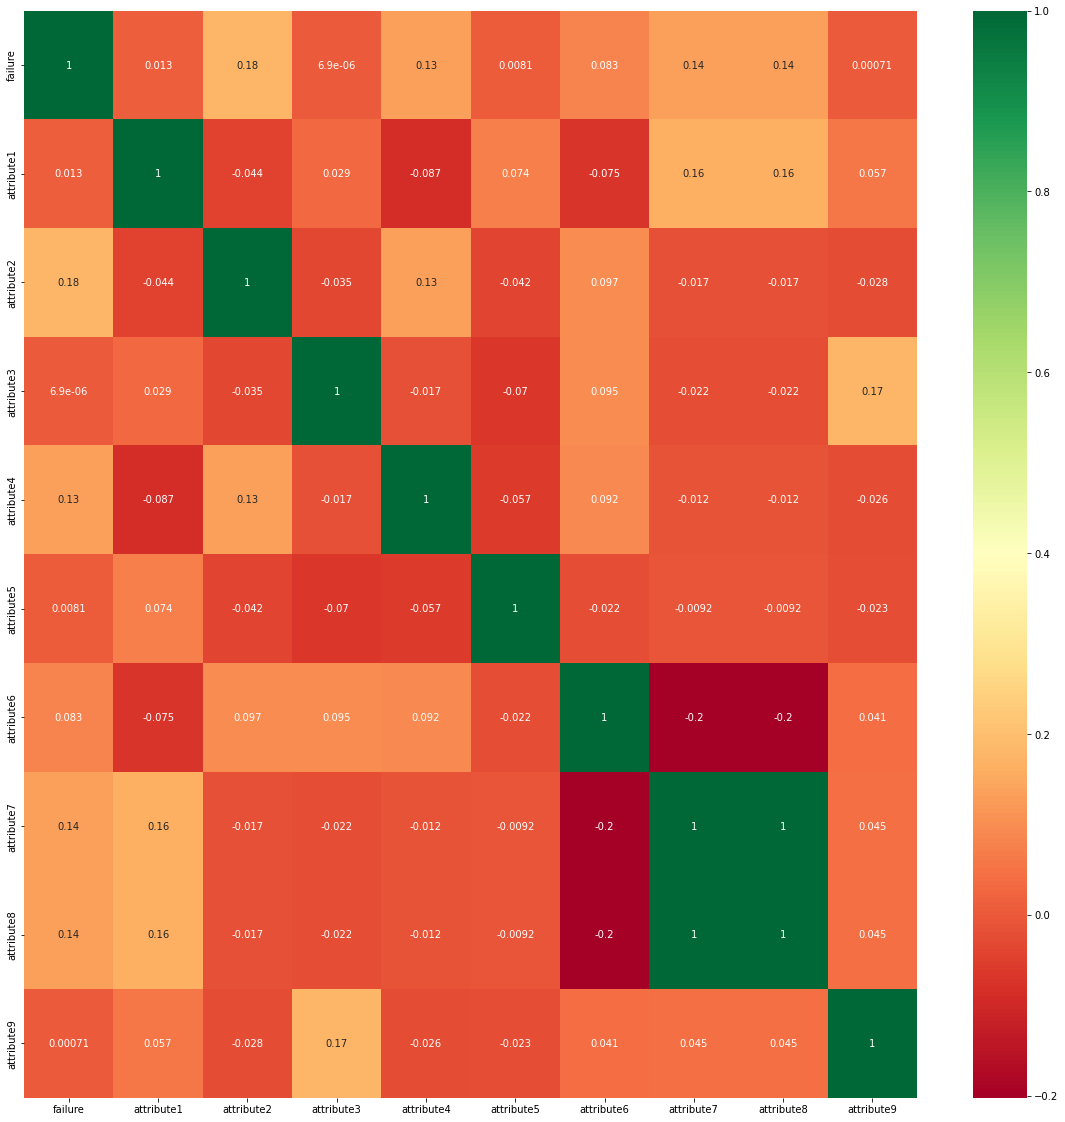

In [27]:
corrmat = df_novo2.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df_novo2[top_corr_features].corr(),annot=True,cmap="RdYlGn")

**Considerações:** Aparentemente a falha não tem nenhuma forte correlação com as features, a maior é com o atributo 2.

In [28]:
df_novo2 = df_novo2.sort_values(by='device', ascending=False)

In [29]:
df_novo2

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
5558,2015-01-02,Z1F1VQFY,0,41152944,0,0,0,6,225283,0,0,0
5677,2015-06-26,Z1F1VQFY,0,193955488,0,0,0,7,264217,0,0,0
5676,2015-06-30,Z1F1VQFY,1,178051496,0,0,0,7,265316,0,0,0
5677,2015-06-30,Z1F1VQFY,1,178051496,0,0,0,7,265316,0,0,0
5678,2015-06-30,Z1F1VQFY,1,178051496,0,0,0,7,265316,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
81,2015-01-19,S1F023H2,1,64499464,0,0,1,19,514661,16,16,3
80,2015-01-19,S1F023H2,1,64499464,0,0,1,19,514661,16,16,3
78,2015-01-19,S1F023H2,1,64499464,0,0,1,19,514661,16,16,3
77,2015-01-19,S1F023H2,1,64499464,0,0,1,19,514661,16,16,3


In [30]:
df_novo2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21214 entries, 5558 to 93
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        21214 non-null  object
 1   device      21214 non-null  object
 2   failure     21214 non-null  int64 
 3   attribute1  21214 non-null  int64 
 4   attribute2  21214 non-null  int64 
 5   attribute3  21214 non-null  int64 
 6   attribute4  21214 non-null  int64 
 7   attribute5  21214 non-null  int64 
 8   attribute6  21214 non-null  int64 
 9   attribute7  21214 non-null  int64 
 10  attribute8  21214 non-null  int64 
 11  attribute9  21214 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 2.1+ MB


In [31]:
# Dropping features that have no impact and Failure Type because it's similar to our label
X = df_novo2.drop(columns={'failure','date','device'})
y = df_novo2['failure']

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, StandardScaler

numeric_values = list(X.select_dtypes(exclude=['object']).columns)
string_values = list(X.select_dtypes(include=['object']).columns)

preprocessor = ColumnTransformer(transformers=[
    ('cat', OrdinalEncoder(), string_values),
    ('num', MinMaxScaler(), numeric_values)
])

## Discovering feature importance

In [33]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=22)


pipe_fi = Pipeline(steps=[('preprocessor', preprocessor), ('clf', rfc)])
pipe_fi.fit(X,y)

feature_importances = rfc.feature_importances_

In [34]:
feature_names = [f"feature {i+1}" for i in range(X.shape[1])]

for i in range(len(feature_importances)):
    print(f"{feature_names[i]}: {feature_importances[i]}")

feature 1: 0.2390760586426208
feature 2: 0.11858958809721702
feature 3: 0.012763473742185704
feature 4: 0.13620377063679223
feature 5: 0.09493872342072832
feature 6: 0.27295953844062654
feature 7: 0.04946691291385753
feature 8: 0.04065283435389484
feature 9: 0.03534909975207706


In [35]:
X.columns

Index(['attribute1', 'attribute2', 'attribute3', 'attribute4', 'attribute5',
       'attribute6', 'attribute7', 'attribute8', 'attribute9'],
      dtype='object')

### Dropping less important features

In [36]:
X = X.drop(columns={'attribute3','attribute7','attribute8','attribute9'})

In [37]:
numeric_values = list(X.select_dtypes(exclude=['object']).columns)
string_values = list(X.select_dtypes(include=['object']).columns)

preprocessor = ColumnTransformer(transformers=[
    ('cat', OrdinalEncoder(), string_values),
    ('num', MinMaxScaler(), numeric_values)
])

## Using cross-validation in a loop through models and scalers to discover the best model

In [38]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

rs = 22

cl_models = [
    SVC(random_state=rs),
    KNeighborsClassifier(3),
    LogisticRegression(random_state=rs),
    DecisionTreeClassifier(random_state=rs),
    RandomForestClassifier(random_state=rs),
    AdaBoostClassifier(random_state=rs),
    GradientBoostingClassifier(random_state=rs),
    ExtraTreesClassifier(random_state=rs)
]

scalers = [
    StandardScaler(),
    MinMaxScaler()
]

for model in cl_models:
  for scaler in scalers:
    pipe = Pipeline(steps=[('prep', preprocessor), ("stdscaler", scaler), ("classifier", model)])

    # 10-Fold Cross-Validation
    scores = cross_val_score(pipe, X, y, cv=10, scoring='precision')

    # Scores
    print(f'Modelo: {model}. Scaler: {scaler}')
    print('Cross-validation scores:', scores)
    print('Mean cross-validation score:', scores.mean())
    print('-----' * 10)

Modelo: SVC(random_state=22). Scaler: StandardScaler()
Cross-validation scores: [0.27099237 0.48       0.76849642 0.20833333 0.71257485 0.64754098
 0.64736842 0.61754386 0.68992248 0.69379845]
Mean cross-validation score: 0.5736571164633552
--------------------------------------------------
Modelo: SVC(random_state=22). Scaler: MinMaxScaler()
Cross-validation scores: [0.7394958  0.52       0.39135381 0.56698821 0.7615894  0.64160401
 0.64599483 0.68119891 0.67424242 0.72801451]
Mean cross-validation score: 0.635048190580049
--------------------------------------------------
Modelo: KNeighborsClassifier(n_neighbors=3). Scaler: StandardScaler()
Cross-validation scores: [0.72641509 0.12820513 0.62285714 0.69282137 0.84693878 0.88712871
 0.87368421 0.75       0.89261745 0.82142857]
Mean cross-validation score: 0.7242096454350948
--------------------------------------------------
Modelo: KNeighborsClassifier(n_neighbors=3). Scaler: MinMaxScaler()
Cross-validation scores: [0.79381443 0.18518

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



Modelo: LogisticRegression(random_state=22). Scaler: StandardScaler()
Cross-validation scores: [0.71625767 0.         0.         0.59846547 0.78873239 0.70776819
 0.89099526 0.8595679  0.57247706 0.74807198]
Mean cross-validation score: 0.5882335929199275
--------------------------------------------------


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



Modelo: LogisticRegression(random_state=22). Scaler: MinMaxScaler()
Cross-validation scores: [0.7151608  0.         0.         0.64752475 0.78596491 0.68414779
 0.8209607  0.79799427 0.57247706 0.71794872]
Mean cross-validation score: 0.5742179006274477
--------------------------------------------------
Modelo: DecisionTreeClassifier(random_state=22). Scaler: StandardScaler()
Cross-validation scores: [0.93965517 0.33333333 0.84070796 0.86976744 0.70063694 0.68567251
 0.85128205 0.91780822 0.74719101 0.82957393]
Mean cross-validation score: 0.7715628586037585
--------------------------------------------------
Modelo: DecisionTreeClassifier(random_state=22). Scaler: MinMaxScaler()
Cross-validation scores: [0.93965517 0.33333333 0.84070796 0.86976744 0.70063694 0.68567251
 0.85128205 0.91780822 0.74719101 0.84650113]
Mean cross-validation score: 0.7732555779868664
--------------------------------------------------
Modelo: RandomForestClassifier(random_state=22). Scaler: StandardScaler()
C

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=22)

## The best model is ExtraTreesClassifier, let's discover its best hyperparameters

In [51]:
from sklearn.model_selection import GridSearchCV

# Hyperparameters
param_grid = {
    'etc__n_estimators':range(100, 300),
    'etc__max_depth': range(1,6),
    'etc__class_weight':['balanced', None]

}

etc = ExtraTreesClassifier(random_state=rs)

# New Pipeline
pipe_ETC = Pipeline(steps=[('preprocessor', preprocessor), ('scaler', MinMaxScaler()) ,('etc', etc)])

# GridSearch
grid_search = GridSearchCV(pipe_ETC, param_grid, cv=10, scoring='precision', verbose=2)
grid_search.fit(X_train, y_train)

# Printing the best hyperparameters
print('Best hyperparameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

# Fitting the pipeline with the best hyperparameters
pipe_ETC = grid_search.best_estimator_
pipe_ETC.fit(X_train, y_train)

A saída de streaming foi truncada nas últimas 5000 linhas.
[CV] END etc__class_weight=None, etc__max_depth=3, etc__n_estimators=200; total time=   0.6s
[CV] END etc__class_weight=None, etc__max_depth=3, etc__n_estimators=200; total time=   0.6s
[CV] END etc__class_weight=None, etc__max_depth=3, etc__n_estimators=200; total time=   0.7s
[CV] END etc__class_weight=None, etc__max_depth=3, etc__n_estimators=200; total time=   0.6s
[CV] END etc__class_weight=None, etc__max_depth=3, etc__n_estimators=200; total time=   0.7s
[CV] END etc__class_weight=None, etc__max_depth=3, etc__n_estimators=200; total time=   0.6s
[CV] END etc__class_weight=None, etc__max_depth=3, etc__n_estimators=200; total time=   0.6s
[CV] END etc__class_weight=None, etc__max_depth=3, etc__n_estimators=200; total time=   0.7s
[CV] END etc__class_weight=None, etc__max_depth=3, etc__n_estimators=201; total time=   0.6s
[CV] END etc__class_weight=None, etc__max_depth=3, etc__n_estimators=201; total time=   0.7s
[CV] END et

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OrdinalEncoder(), []),
                                                 ('num', MinMaxScaler(),
                                                  ['attribute1', 'attribute2',
                                                   'attribute4', 'attribute5',
                                                   'attribute6'])])),
                ('scaler', MinMaxScaler()),
                ('etc',
                 ExtraTreesClassifier(max_depth=5, n_estimators=221,
                                      random_state=22))])

In [52]:
print('Best estimator:', grid_search.best_estimator_)
print('Best parameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

Best estimator: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OrdinalEncoder(), []),
                                                 ('num', MinMaxScaler(),
                                                  ['attribute1', 'attribute2',
                                                   'attribute4', 'attribute5',
                                                   'attribute6'])])),
                ('scaler', MinMaxScaler()),
                ('etc',
                 ExtraTreesClassifier(max_depth=5, n_estimators=221,
                                      random_state=22))])
Best parameters: {'etc__class_weight': None, 'etc__max_depth': 5, 'etc__n_estimators': 221}
Best score: 0.9089269393615707


## Fitting ExtraTreesClassifier with the best parameters

Precision: 0.9149539333805812
ROCAUC score: 0.7180909721111289
Accuracy score: 0.7156862745098039
F1 score: 0.6312958435207824


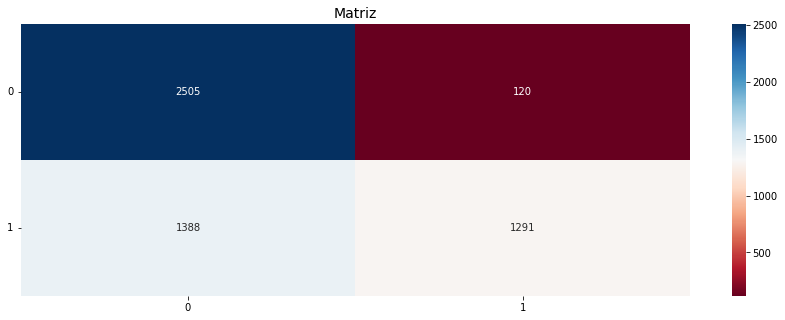

------------------------------------------------------------------------------------------


In [55]:
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, precision_score

etc_final = ExtraTreesClassifier(max_depth=5, n_estimators=221,random_state=22)

pipe_ETC_F = Pipeline(steps=[('preprocessor', preprocessor),('etc', etc_final)])
pipe_ETC_F.fit(X_train, y_train)

etc_predict = pipe_ETC_F.predict(X_test)

roc_auc = roc_auc_score(y_test, etc_predict)
accuracy = accuracy_score(y_test, etc_predict)
f1 = f1_score(y_test, etc_predict)

positive_class = 1

precision = precision_score(y_test, etc_predict, pos_label=positive_class)

# Printing precision
print('Precision:', precision)

# Printing metrics
print('ROCAUC score:', roc_auc)
print('Accuracy score:', accuracy)
print('F1 score:', f1)

# Confusion matrix
from sklearn.metrics import confusion_matrix

conf = confusion_matrix(y_test, etc_predict)
plt.figure(figsize=(15,5))
sns.heatmap(conf,annot=True,fmt="d",cmap='RdBu')
plt.title('Matriz',fontsize=14)
plt.yticks(rotation =0)
plt.show()
print("---"*30)

In [61]:
import pickle
pickle.dump(pipe_ETC_F, open(file='Modelo_Decision_MELI.pkl', mode='wb'))

## Obrigado.